In [1]:
import numpy as np
from hyperobjects import *

In [61]:
np.random.seed(6)
p, n, m = 2, 3, 6
T = Cube(m)

A1 = np.random.uniform(size=(n, p))
N1 = np.random.uniform(-5,5,size=(n, m))
P1 = np.linalg.pinv(A1) @ (N1 @ T)


A2 = np.random.uniform(size=(n, p))
N2 = np.random.uniform(-5,5,size=(n, m))
P2 = np.linalg.pinv(A2) @ (N2 @ T)

U21 = A1 @ np.linalg.pinv(A2)
print(U21)
P2p = np.linalg.pinv(U21 @ A2) @ (N2 @ T) # P2 in the frame of P1

# K1 = P1.K_section
# K2 = P2.K_section

K1 = ~(AffineMap(N1).T(~im(AffineMap(A1))))
print(K1.generators)

K2 = ~(AffineMap(N2).T(~im(AffineMap(A2))))

G1 = np.linalg.pinv(A1) @ N1
G2 = np.linalg.pinv(A2) @ N2

# G120
KerG1mG2 = ker(AffineMap(G1 - G2))
print(KerG1mG2.generators)
G = np.hstack([G1, np.zeros_like(G2)]) # , np.zeros_like(KerG1mG2.generators)
# print(KL.shape)
KK = np.vstack([K1.generators, K2.generators])
K12 = (K1 & K2) & Cube(m)
print(K12)
# A = np.hstack([K1.generators, K2.generators])
# print(A.shape)
# Test = G @ (AffineSpace(A) & Sphere(A.shape[1]))
Test = G @(AffineSpace(KK) & Sphere(2*m))


[[ 0.973628   -0.3409331   0.60752012]
 [ 0.92172809 -0.61434558  0.60578755]
 [ 0.06221736  0.59204786 -0.02570451]]
[[-0.37950136 -0.11499387 -0.57704043 -0.63720562  0.24932873]
 [ 0.88037312 -0.03624851 -0.18189539 -0.20086073  0.07859371]
 [-0.03624851  0.98901623 -0.05511668 -0.06086343  0.02381492]
 [-0.18189539 -0.05511668  0.72342393 -0.3054133   0.11950351]
 [-0.20086073 -0.06086343 -0.3054133   0.66274275  0.13196356]
 [ 0.07859371  0.02381492  0.11950351  0.13196356  0.94836469]]
[[ 0.40410909 -0.60573523 -0.12191599 -0.6305544 ]
 [ 0.31222827  0.02654821 -0.00997996  0.09602839]
 [ 0.72511042  0.14482964  0.03742904  0.11381104]
 [ 0.32270533  0.71991723 -0.06268141 -0.26339846]
 [ 0.06771873 -0.05442038  0.98758794 -0.05013869]
 [ 0.32357328 -0.30026989 -0.0661593   0.71297553]]


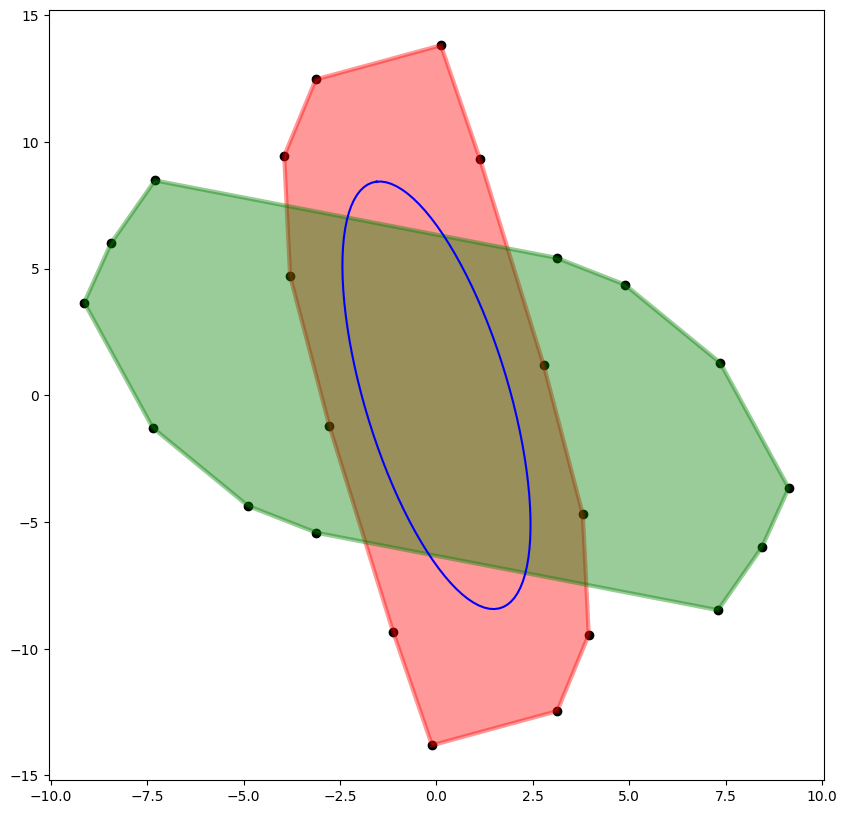

In [63]:
%matplotlib inline


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1)
P1.plot(ax, tol=0.01, color="red")
P2.plot(ax, tol=0.01, color="green")
# P2p.plot(ax, color="blue")
Test.plot(ax, color="blue")


In [378]:
%matplotlib qt5


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1, projection="3d")
P1.plot(ax, in_intermediate_space= True,alpha=0.5, color="red")
P2.plot(ax, in_intermediate_space= True,alpha=0.5, color="green")


Visual: no faces found, calculating faces
using provided 3d axis
Visual: no faces found, calculating faces
using provided 3d axis


In [347]:
%matplotlib qt5
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1, projection="3d")
# (Cube(3)).plot(ax, color="red", alpha=0.5)

# NS = N1.T @ N2
# print(np.linalg.svd(NS.matrix))
# _, _, R = np.linalg.svd(NS.matrix)
# (np.linalg.pinv(N1_) @ N2_ @ (Cube(3))).plot(ax, color="green", alpha=0.5)
# print(NS.translation)
Q = np.array([
    [0,0,0],
    [0,0,1]
])
AffineSpace(A.T).plot(ax, color="black")
AA = AffineSpace(A.T)

((~N1.T(~AffineSpace(Q)))).plot(ax, color="red")
((~N2.T(~AffineSpace(Q)))).plot(ax, color="green")

# From N1 to identity
((vt1 @ Cube(3)) + vt1 @ np.linalg.pinv(N1_)@N1.translation).plot(ax, color="red", alpha=0.2)

((vt2 @ Cube(3)) + vt2 @ np.linalg.pinv(N2_)@N2.translation).plot(ax, color="green", alpha=0.2)
# (AffineSpace(N1_, N1.translation)).plot(ax, color="black", alpha=0.6)


Visual: no faces found, calculating faces
using provided 3d axis
Visual: no faces found, calculating faces
using provided 3d axis


In [329]:
Q = np.array([
    [0,0,0],
    [0,0,1]
])

array([[ 1.97728825, -2.83910504,  4.76274455],
       [-4.93769745, -2.47017638, -0.65208468]])

In [160]:
(N1.T @ N2).matrix

array([[ 10.4057747 ,  21.23696562, -32.43902806],
       [  8.69012217,  28.79829597, -30.11255854],
       [-13.89520141,  -3.95409765,  36.65066983]])

In [189]:
N1_ @ np.linalg.pinv(N1_) @ N2_

array([[-6.72315517,  1.94667888, -9.82027805],
       [-2.26857435, -9.11679884,  9.13305935]])

In [190]:
N2_

array([[-6.72315517,  1.94667888, -9.82027805],
       [-2.26857435, -9.11679884,  9.13305935]])